In [61]:
import pandas as pd
import pandas_profiling
import os

DATA_DIR = "."
DUMP_FILE_EN = os.path.join(DATA_DIR, "abstract_en.pkl")
DUMP_FILE_KO = os.path.join(DATA_DIR, "abstract_ko.pkl")

data_en = pd.read_pickle(DUMP_FILE_EN)
data_ko = pd.read_pickle(DUMP_FILE_KO)


In [2]:
# 리포트 생성
pr_en = data_en.profile_report()
pr_ko = data_ko.profile_report()

pr_en.to_file('./pr_en_report.html')
pr_ko.to_file('./pr_ko_report.html')

In [3]:
pr_en

In [4]:
pr_ko

In [62]:
### 데이터 전처리
### 1. label번호 바꾸기 (db랑 비교)
### 2. train_data / test_data 나누기

subjects = ["기타자연과학", "대기과학", "물리학", "생물학", "생활과학", "수학", "자연과학", "자연과학일반", "지구과학", "지질학", "천문학", "통계학", "해양학", "화학", "건축공학", "고분자공학", "공학", "공학일반", "교통공학", "금속공학", "기계공", 
"기타공학", "농공학", "산림공학", "산업공학", "생물공학", "섬유공학", "안전공학", "원자력공학", "의공학", "자동차공학", "자원공학", "재료공학", "전기공학", "전자/정보통신공학", "제어계측공학", "조선공학", "컴퓨터학", "토목공학", "항공우주공학", "해양공학", "화학공학", "환경공학"
]

results = []
for idx in range(0, len(data_en)):
    if data_en['subject'][idx] is None:
        results.append(0)
        continue
    
    i = 0
    flag = True
    for subject in subjects:
        i += 1
        if data_en['subject'][idx] == subject:
#             print(data_en['subject'][idx])
            flag = False
            results.append(i)
            break
    
    if flag is True:
        results.append(0)

data_en['label'] = results
print(data_en.head(20))


    id                                          title_kor title_eng  \
0    1  Characterization of Electrical Heating of Grap...             
1    2  The textile products labelling analysis and re...             
2    3  Consumer resistance to innovation: smart clothing             
3    4  Experimental design and evaluation of a moistu...             
4    5  Application of persimmon (Diospyros kaki L.) p...             
5    6  Constructing cultural identity through weaving...             
6    7  On the fashionalization of digital devices: a ...             
7    8  Top online luxury apparel and accessories reta...             
8    9  Changing structures of B2B networks in the Jap...             
9   10  Predicting clothing behaviors of Generation Y ...             
10  11  Product experiences of clothing attachment in ...             
11  12  Physiological and subjective burden when weari...             
12  13  ‘Neo-Crosssexual’ fashion in contemporary men’...             
13  14

In [63]:
df = data_en.loc[:, ["id", "title_kor", "abstract", "label", "subject", "keyword_kor"]]
# df = data_en.loc[:, ["abstract", "label"]]

# for abstract
# 특수 문자, 길이 짧은 단어, 소문자 변환
df["abstract_clean"] = df["abstract"].str.replace("[^a-zA-Z]", " ")
df["abstract_clean"] = df["abstract_clean"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df["abstract_clean"] = df["abstract_clean"].apply(lambda x: x.lower())

# Null 값 및 empty값 확인
df["abstract_clean"].isnull().values.any()
df.replace("", float("NaN"), inplace=True)
df["abstract_clean"].isnull().values.any()
# print(df.head(1))

True

In [54]:
# for keyword
# 특수 문자, 길이 짧은 단어, 소문자 변환
df["keyword_clean"] = df["keyword_kor"].str.replace("[^a-zA-Z]", " ")
df["keyword_clean"] = df["keyword_clean"].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>3]))
df["keyword_clean"] = df["keyword_clean"].apply(lambda x: x.lower())

# Null 값 및 empty값 확인
df["keyword_clean"].isnull().values.any()
df.replace("", float("NaN"), inplace=True)
df["keyword_clean"].isnull().values.any()

True

In [64]:
# from nltk.corpus import stopwords
# import numpy as np
# import matplotlib.pyplot as plt

# Null 값 제거
print('총 샘플 수: ', len(df))
df.dropna(inplace=True)
# print(df.head(10))
print('총 샘플 수: ', len(df))

# label 지정 안된 값 제거
df = df[df.label != 0]
print('총 샘플 수: ', len(df))
# print(df[df.label == 0])

총 샘플 수:  49191
총 샘플 수:  48516
총 샘플 수:  42515


In [65]:
# for abstract
# 불용어 제거
stop_words = stopwords.words('english')
tokenized_doc = df['abstract_clean'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 42515


C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [57]:
# for keyword
# 불용어 제거
stop_words = stopwords.words('english')
tokenized_keyword = df['keyword_clean'].apply(lambda x: x.split())
tokenized_keyword = tokenized_keyword.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_keyword = tokenized_keyword.to_list()

# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_keyword) if len(sentence) <= 1]
tokenized_keyword = np.delete(tokenized_keyword, drop_train, axis=0)
# df['tokenized_keyword'] = tokenized_keyword

print('총 샘플 수 :',len(tokenized_keyword))

총 샘플 수 : 40157


In [66]:
df['tokenized_doc'] = tokenized_doc
df

id                                          title_kor  \
0          1  Characterization of Electrical Heating of Grap...   
1          2  The textile products labelling analysis and re...   
2          3  Consumer resistance to innovation: smart clothing   
3          4  Experimental design and evaluation of a moistu...   
4          5  Application of persimmon (Diospyros kaki L.) p...   
...      ...                                                ...   
49186  75729  국내 특고압 고객에 대한 IEC 61000-3-7 기반의 플리커 방출한계 평가 및 ...   
49187  75730    플러그인 하이브리드 전기자동차 볼트의1세대와 2세대 동력전달계 비교 분석에 관한 연구   
49188  75731  FOURIER SERIES OF r-DERANGEMENT AND HIGHER-ORD...   
49189  75732                                 고시인성 LED 횡단보도 조명설계   
49190  75733  Nanomaterials for bioelectronics and integrate...   

                                                abstract  label subject  \
0      Conveyor fused deposition modelling (CFDM) 3D ...      5    생활과학   
1      The textile sector is one of the most represen...      5    생활과학   
2      Smart clothing is believed to have an enormous...      5    생활과학   
3      Women prefer to wear a sports bra not only for...      5    생활과학   
4      The aim of this study is to investigate the ef...      5    생활과학   
...                                                  ...    ...     ...   
49186  IEC 61000-3-7 provides guidance for limiting f...     34    전기공학   
49187  In this paper, the equations pertaining to pow...     31   자동차공학   
49188  A derangement is a permutation that has no fix...      6      수학   
49189  We proposed high visibility smart LED lighting...     34    전기공학   
49190  Biomedical electronic devices integrated with ...     42    화학공학   

                                             keyword_kor  \
0      CFDM 3D printer, Graphene/PLA, Honeycomb, Fine...   
1      European Union, Clothes, Textile labelling reg...   
2      Grounded theory, Resistance to innovation, Sma...   
3      Sports bra, Moisture responsive, Seamless knit...   
4      Persimmon peel, Reductant, Indigo dyeing, Redo...   
...                                                  ...   
49186  Flicker, IEC 61000-3-7, Power quality, Emissio...   
49187  Plug-in hybrid electric vehicle(플러그인 하이브리드 전기자...   
49188  r-derangement numbers, higher-order derangemen...   
49189  Light Emitting Diode, LED Lighting, Crosswalk,...   
49190  Nanomaterial, Flexible Electronics, Bioelectro...   

                                          abstract_clean  \
0      conveyor fused deposition modelling cfdm print...   
1      textile sector most representative spanish ind...   
2      smart clothing believed have enormous growth p...   
3      women prefer wear sports only exercising also ...   
4      this study investigate efficacy persimmon dios...   
...                                                  ...   
49186  provides guidance limiting flicker enabling co...   
49187  this paper equations pertaining powertrain spe...   
49188  derangement permutation that fixed points dera...   
49189  proposed high visibility smart lighting solve ...   
49190  biomedical electronic devices integrated with ...   

                                           tokenized_doc  
0      [conveyor, fused, deposition, modelling, cfdm,...  
1      [textile, sector, representative, spanish, ind...  
2      [smart, clothing, believed, enormous, growth, ...  
3      [women, prefer, wear, sports, exercising, also...  
4      [study, investigate, efficacy, persimmon, dios...  
...                                                  ...  
49186  [provides, guidance, limiting, flicker, enabli...  
49187  [paper, equations, pertaining, powertrain, spe...  
49188  [derangement, permutation, fixed, points, dera...  
49189  [proposed, high, visibility, smart, lighting, ...  
49190  [biomedical, electronic, devices, integrated, ...  

[42515 rows x 8 columns]

In [60]:
pd.to_pickle(df, "clean_data_en.pkl")

12876    [various, applications, require, data, center,...
20319    [paper, presents, experimental, results, study...
24545    [thorium, four, times, abundant, uranium, natu...
15952    [research, novel, method, namely, vortex, assi...
11378    [march, ring, finger, ligase, involved, mitoch...
                               ...                        
37584    [igzo, thin, films, prepared, type, substrates...
20068    [purposes, study, aimed, developing, asphalt, ...
27962    [modeling, cyclical, process, creating, modify...
39578    [investigate, energetics, involved, tension, c...
31986    [carbon, fiber, reinforced, composites, cfrp, ...
Name: tokenized_doc, Length: 34012, dtype: object
19497    [fully, integrated, watt, level, broadband, po...
10744    [taiwan, mesoscale, ensemble, prediction, syst...
44300    [high, voltage, power, lines, sometimes, share...
18937    [present, insulation, design, techniques, envi...
27682    [green, transportation, dictated, carbon, poli...
      

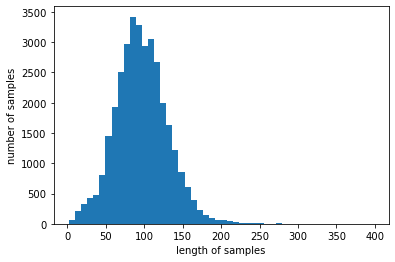

In [67]:
### Splitting Data
### https://wikidocs.net/33274
import numpy as np
from sklearn.model_selection import train_test_split

df['tokenized_doc'] = tokenized_doc

X_train, X_test, y_train, y_test = train_test_split(df['tokenized_doc'], df['label'], test_size= 0.2, random_state=1234)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

# null 값 제거
# train_data = train_data.dropna(how='any')
# test_data = test_data.dropna(how='any')

print('최대 길이 :',max(len(l) for l in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [10]:
# 리포트 생성
pr = df.profile_report()

pr.to_file('F:\SSAFY\BigDataPJT\LAST\pr_en_report.html')

pr

In [68]:
# 텍스트 단어 부호화(정수 인코딩)
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=35000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [69]:
print(X_train[:3])
print(X_test[:3])

[[29, 184, 1402, 12, 693, 3241, 611, 1318, 12, 693, 535, 1672, 1678, 1299, 1714, 611, 473, 19, 495, 1193, 387, 12, 693, 535, 223, 124, 4653, 14, 539, 11, 2334, 419, 3359, 99, 702, 1454, 246, 2670, 852, 399, 2319, 191, 5645, 26989, 2592, 26989, 1543, 2688, 5744, 246, 2670, 12265, 2688, 27, 867, 1209, 7289, 317, 26989, 1021, 16229, 611, 23876, 1377, 1947, 3391, 707, 151, 220, 200, 3359, 282, 246, 2670, 12, 1830, 31399, 4880, 26989, 12266, 5646, 4162, 186, 246, 2670, 625, 15447, 99, 612, 399, 3649, 2018, 621, 1812, 6229, 2043, 2944, 12266, 301, 1203, 611, 3649, 974, 9, 2019, 14121, 110, 2334], [13, 422, 62, 3, 1, 3929, 236, 160, 1626, 45, 1, 1890, 236, 160, 5418, 453, 2856, 9615, 281, 1385, 281, 43, 101, 128, 8340, 1381, 4214, 7290, 236, 160, 4434, 38, 3929, 281, 25, 156, 147, 236, 160, 683, 877, 52, 189, 656, 626, 4434], [9428, 178, 303, 2380, 5046, 1209, 801, 28, 304, 488, 9428, 5842, 17179, 829, 5046, 1, 163, 164, 191, 335, 854, 9428, 630, 22, 178, 190, 65, 1150, 104, 251, 191, 95, 304

In [70]:
#### 딥러닝
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# X_train, X_test, y_train, y_test 
# 데이터 준비
# train_label = train_data['label']
# test_label = test_data['label']

# 데이터 정규화
X_train = pad_sequences(X_train,maxlen=398)
X_test = pad_sequences(X_test,maxlen=398)
y_train = to_categorical(np.asarray(y_train))
y_test = to_categorical(np.asarray(y_test))

print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)
print('y_train의 크기(shape):', y_train.shape)
print('y_test의 크기(shape):', y_test.shape)

print(y_train[:5])
print(y_test[:5])

X_train의 크기(shape) : (34012, 398)
X_test의 크기(shape) : (8503, 398)
y_train의 크기(shape): (34012, 44)
y_test의 크기(shape): (8503, 44)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [71]:
import numpy as np

def vectorize_sequences(sequences, dimension=35000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(X_train) # 훈련 데이터 벡터 변환
X_test = vectorize_sequences(X_test) # 테스트 데이터 벡터 변환

print(X_train[0])
print(y_train[0])

[1. 0. 0. ... 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [72]:
from tensorflow.keras.layers import Dense, Conv1D, LSTM, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(35000,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(44, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, batch_size=1024, validation_split=0.2)

# model.add(Embedding(35000, 398))
# model.add(LSTM(398))
# model.add(Dense(44, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_split=0.2)

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# history = model.fit(X_train, y_train, batch_size=1024, epochs=20, callbacks=[es, mc], validation_data=(X_test, y_test))



Train on 27209 samples, validate on 6803 samples
Epoch 1/10
27209/27209 [==============================] - 28s 1ms/sample - loss: 2.9660 - accuracy: 0.3232 - val_loss: 2.2281 - val_accuracy: 0.4695
Epoch 2/10
27209/27209 [==============================] - 14s 511us/sample - loss: 2.0140 - accuracy: 0.5115 - val_loss: 1.7542 - val_accuracy: 0.5549
Epoch 3/10
27209/27209 [==============================] - 15s 555us/sample - loss: 1.5954 - accuracy: 0.5913 - val_loss: 1.5412 - val_accuracy: 0.5911
Epoch 4/10
27209/27209 [==============================] - 12s 446us/sample - loss: 1.3314 - accuracy: 0.6495 - val_loss: 1.4075 - val_accuracy: 0.6155
Epoch 5/10
27209/27209 [==============================] - 19s 708us/sample - loss: 1.1264 - accuracy: 0.6976 - val_loss: 1.3311 - val_accuracy: 0.6218
Epoch 6/10
27209/27209 [==============================] - 16s 606us/sample - loss: 0.9548 - accuracy: 0.7407 - val_loss: 1.2908 - val_accuracy: 0.6321
Epoch 7/10
27209/27209 [=======================

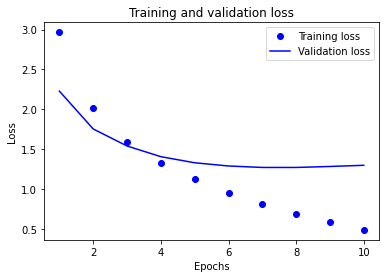

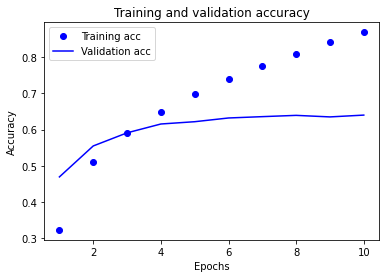

In [73]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf() # 그래프를 초기화합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [74]:
results = model.evaluate(X_test, y_test)

8503/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [75]:
from keras.models import load_model
model.save('model_10epoch.h5')

In [1]:
# 2. 모델 불러오기
# from keras.models import load_model
import tensorflow as tf 
model = tf.keras.models.load_model('./mnist_mlp_model.h5')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\pydot.py", line 1915, in create
    working_dir=tmp_dir,
  File "C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\pydot.py", line 136, in call_graphviz
    **kwargs
  File "C:\ProgramData\Anaconda3\envs\venv\lib\subprocess.py", line 729, in __init__
    restore_signals, start_new_session)
  File "C:\ProgramData\Anaconda3\envs\venv\lib\subprocess.py", line 1017, in _execute_child
    startupinfo)
FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\keras\utils\vis_utils.py", line 28, in _check_pydot
    pydot.Dot.create(pydot.Dot())
  File "C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\pydot.py", line 1922, in create
    raise OSError(*args)
FileNotFoundError: [WinError 2] "dot" not found in path.

During handling of the 

TypeError: object of type 'NoneType' has no len()

In [36]:
### ===============================================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 256
batch_size = 256

model = Sequential()
model.add(Embedding(42925, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

np_X_train = np.array(X_train)
np_y_train = np.array(y_train)

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(np_X_train, np_y_train, epochs = 20, callbacks=[es, mc])

Train on 34340 samples
Epoch 1/20
34340/34340 [==============================] - 196s 6ms/sample - loss: -1514002656.6754 - acc: 0.0076
Epoch 2/20
34340/34340 [==============================] - 195s 6ms/sample - loss: -39714926129.6792 - acc: 0.0076
Epoch 3/20
34340/34340 [==============================] - 192s 6ms/sample - loss: -211842112584.6402 - acc: 0.0076
Epoch 4/20
34340/34340 [==============================] - 195s 6ms/sample - loss: -623703719130.6362 - acc: 0.0076
Epoch 5/20
34340/34340 [==============================] - 198s 6ms/sample - loss: -1380917604291.4070 - acc: 0.0076
Epoch 6/20
34340/34340 [==============================] - 196s 6ms/sample - loss: -2583866267441.1724 - acc: 0.0076
Epoch 7/20
34340/34340 [==============================] - 195s 6ms/sample - loss: -4357193447473.8579 - acc: 0.0076
Epoch 8/20
34340/34340 [==============================] - 198s 6ms/sample - loss: -6808977984274.0410 - acc: 0.0076
Epoch 9/20
34340/34340 [==============================] 

34340/34340 [==============================] - 187s 5ms/sample - loss: -145218430248407.2812 - acc: 0.0076


In [ ]:

# 모델 생성
model = Sequential()

model.add(Embedding(30000,100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# 모델 설정
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습
model.fit(X_train,
          y_train,
          epochs=100,
          batch_size=60,
          validation_split=0.2)

# 모델 평가
result = model.evaluate(X_test, y_test)
print('loss =', result[0])
print('accuracy=', result[1])